# Symbolic Regression with genetic programming

In [6]:
#Data manipulation, handling and function creation
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Genetic programming libraries
import gplearn as gp
from gplearn.genetic import SymbolicRegressor
from gplearn.functions import make_function

In [7]:
# Plot properties and format
plt.rcParams.update({'mathtext.default':'regular'}) # Latex in text
sns.set(context='notebook', font='Times New Roman', font_scale=1, style='ticks')
%matplotlib notebook

<IPython.core.display.Javascript object>


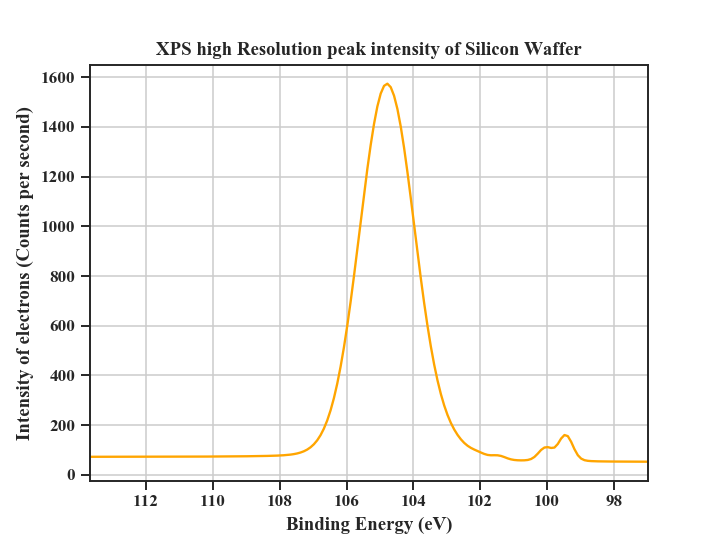

In [8]:
# Read a dataset using pandas
df = pd.read_csv('./Data/11_Si2p.fit',sep='\t')

# Plot the contents to visualize 
plt.figure()
plt.plot(df.x, df.yCal, c='orange')
plt.title('XPS high Resolution peak intensity of Silicon Waffer')
plt.xlabel('Binding Energy (eV)')
plt.ylabel('Intensity of electrons (Counts per second)')
plt.grid()

# Usualy in this plots, the data is seen as in an inverted axis. 
plt.xlim(df.x.max(), df.x.min())
plt.show()
X0 = np.array(df.x).reshape(-1, 1)

In [224]:
# Use the Symbolic Regressor

# Use the sets: 
funct = ['add', 'sub', 'mul', 'div', 'sin']

# Create a Symbolic Regressor object
est_gp =  SymbolicRegressor(population_size=5000,
                           generations=100,
                           stopping_criteria=0.01,
                           function_set = funct,
                           p_crossover=0.7,
                           p_subtree_mutation=0.1,
                           max_samples=0.9,
                           verbose=1,
                           parsimony_coefficient=0.01,
                           random_state=0)
# Fit with the data
est_gp.fit(np.array(df.x).reshape(-1, 1), np.array(df.yCal))

# Print the final result
print(est_gp._program)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    31.51       3.2502e+11        7          170.876          416.229      7.65m
   1    23.63           109754       27          150.635          605.407      5.89m
   2    24.30           430587       32          156.911          553.839      5.57m
   3    25.57          59898.6      104          150.305          646.143      5.74m
   4    29.41           291337        7          155.992          547.919      5.91m
   5    33.94       2.6532e+06       19          156.339          535.286      6.16m
   6    37.86          47373.8       51          152.095          594.304      7.27m
   7    41.52      1.64492e+06       45           148.88          617.886      7.92m
   8    44.86          15283.3       74          155.953           542.23  

  94    87.22          1964.49       57          151.963          572.166     31.30s
  95    91.00          2721.62      163          154.386          443.165     25.45s
  96    97.50          1229.06      179          140.698          451.513     20.64s
  97   107.88          1732.06      176          142.957          438.513     14.12s
  98   127.68          53251.5      168          127.493          385.947      8.30s
  99   166.52          53533.3      165          125.388          390.625      0.00s
add(mul(div(0.672, X0), mul(X0, X0)), div(mul(X0, -0.688), add(sub(add(sub(sin(sub(add(sin(X0), div(add(sin(mul(sin(div(0.672, X0)), mul(X0, -0.688))), 0.796), mul(-0.060, -0.893))), add(sin(add(mul(X0, -0.688), div(sin(sin(add(-0.900, X0))), add(0.125, X0)))), add(div(0.408, -0.286), sin(X0))))), sub(sin(X0), sub(mul(sin(sin(sub(X0, div(0.672, X0)))), sin(0.861)), div(-0.125, sub(mul(div(sin(-0.406), mul(div(div(-0.125, mul(X0, -0.661)), X0), sin(X0))), X0), sin(X0)))))), div(add(mul(

In [9]:
# Since the program prints a text containing the functions that can be made, it is possible to
# copy and paste this functions, which are not defined in the python language,
#and compute the operations:

def sub(a,b):
    return a-b
def add(a,b):
    return a+b
def mul(a,b):
    return a*b
def sin(a):
    return np.sin(a)
def div(a,b):
    return a/b
def log(a):
    return np.log(np.abs(a))
def cos(a):
    return np.cos(a)
def neg(a):
    return -1*a
def exp(x1):
    with np.errstate(over='ignore'):
        return np.where(np.abs(x1) < 50, np.exp(x1), 0.)
def sq(x1):
    return x1*x1
def cu(x1):
    return x1*x1*x1

# Now a copy and paste of the output can be generated

In [10]:
# Take the array
X0 = np.array(df.x)

# It is possible to copy and paste the results from the Symbolic Regression
# Since the functions are already defined, one can proceed to obtain the value
y= add(mul(div(0.672, X0), mul(X0, X0)), div(mul(X0, -0.688), add(sub(add(sub(sin(sub(add(sin(X0),
   div(add(sin(mul(sin(div(0.672, X0)), mul(X0, -0.688))), 0.796), mul(-0.060, -0.893))), 
   add(sin(add(mul(X0, -0.688), div(sin(sin(add(-0.900, X0))), add(0.125, X0)))), add(div(0.408,
   -0.286), sin(X0))))), sub(sin(X0), sub(mul(sin(sin(sub(X0, div(0.672, X0)))), sin(0.861)),
   div(-0.125, sub(mul(div(sin(-0.406), mul(div(div(-0.125, mul(X0, -0.661)), X0), sin(X0))), X0),
   sin(X0)))))), div(add(mul(X0, 0.752), mul(X0, -0.688)), add(add(div(0.680, -0.526), sin(sub(
   sin(sub(sin(mul(sub(sub(sin(X0), sin(add(mul(X0, -0.688), div(sin(sin(add(-0.900, X0))), 
   add(0.125, X0))))), mul(div(X0, X0), mul(X0, X0))), sin(sub(X0, X0)))), 0.125)), add(mul(X0,
   -0.688), sub(-0.929, 0.998))))), sin(X0)))), -0.688), div(sin(div(add(-0.409, X0), add(add(X0,
   0.578), -0.683))), add(sin(-0.538), X0)))))

<IPython.core.display.Javascript object>


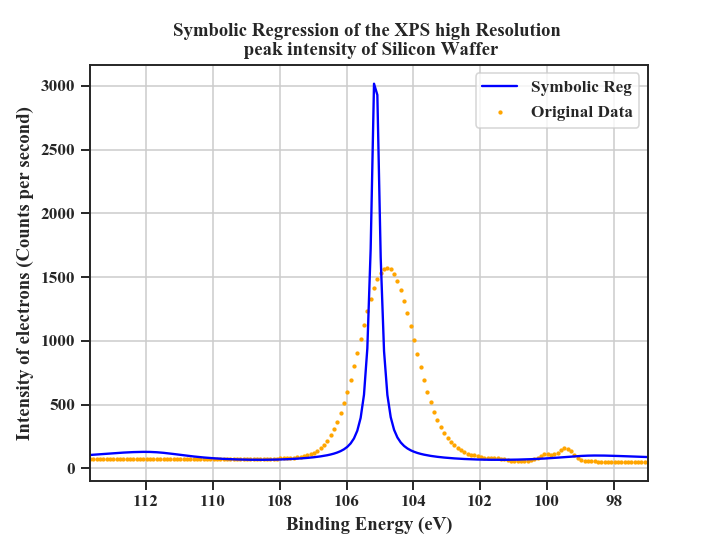

In [12]:
# Plot the results obtained
plt.figure()
plt.scatter(X0, df.yCal, c='orange', label='Original Data', s=3)
plt.plot(X0, y, c='blue', label='Symbolic Reg')
plt.title('Symbolic Regression of the XPS high resolution \n peak intensity of Silicon Waffer')
plt.xlabel('Binding Energy (eV)')
plt.ylabel('Intensity of electrons (Counts per second)')
plt.legend()
plt.grid()
plt.xlim(df.x.max(), df.x.min())
plt.show()

In [8]:
# Use some of the created functions that are not in the common equation for the function set, 
# since this functions correspond better to the development of the plot,
#one can expect to obtain better approximations with the symbolic regression

exponential = make_function(function=exp, name='exp', arity=1)
squared = make_function(function=sq, name='sq', arity=1)
cubed = make_function(function=cu, name='cu', arity=1)

# Use the Symbolic Regressor to find a function
est_gp2 =  SymbolicRegressor(population_size=2000, 
                           const_range=(-5,5),
                           tournament_size = 10,
                           generations = 50,
                           stopping_criteria = 0.01,
                           function_set = ['add', 'sub', 'mul', 'div',
                                           'sin', exponential, 'neg', squared, cubed],
                           p_subtree_mutation=0.1,
                           p_crossover=0.7,
                           p_hoist_mutation=0.01,
                           max_samples=1.0,
                           verbose=1,
                           parsimony_coefficient=0.001)
# Fit with the data
est_gp2.fit(np.array(df.x).reshape(-1, 1), np.array(df.yCal))

# Print the final result
print(est_gp2._program)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    14.37     1.27689e+162        3           193.35              N/A     50.43s
   1    11.92      3.41886e+33        3          193.344              N/A     46.79s
   2    11.99      2.61445e+38        3          193.344              N/A     44.60s
   3    12.57      9.99933e+45        6          193.307              N/A     42.55s
   4    13.05      1.70943e+33        6          193.307              N/A     41.37s
   5    11.17     3.32344e+186        8          193.296              N/A     42.26s
   6     5.24      1.15708e+76       11          193.166              N/A     36.95s
   7     4.26      2.38699e+88       11          193.166              N/A     35.34s
   8     6.00      4.76725e+58       11          193.157              N/A  

/home/dhdzmota/.local/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in multiply


  15    24.31              inf       54          192.081              N/A     36.16s
  16    29.71      3.83113e+51       54          192.081              N/A     40.21s
  17    37.59      3.16408e+60       63          191.562              N/A     42.39s
  18    46.05      3.00837e+32       46          191.497              N/A     43.86s
  19    54.44      9.49759e+21       85          191.303              N/A     46.09s
  20    62.19      3.55425e+17      105          190.733              N/A     47.45s
  21    73.22      2.77263e+15      124          190.444              N/A     48.37s
  22    84.54      8.56572e+14      158          190.084              N/A     50.93s
  23    99.28      8.59405e+14      169          189.801              N/A     53.31s
  24   121.56       3.2447e+19      257          189.152              N/A     57.45s
  25   144.36      1.71314e+15      367          188.245              N/A      1.02m
  26   170.01      1.70943e+33      308           188.09         

In [13]:
y_new= add(sq(sin(sin(X0))), add(sin(add(sin(div(mul(div(mul(X0, -3.222), neg(4.847)), 
    -3.222), neg(4.847))), add(neg(sin(div(X0, -3.897))), add(sin(div(X0, sub(mul(-4.627,
    3.869), sub(X0, X0)))), add(sin(add(neg(-4.217), add(neg(sin(div(X0, -3.897))), 
    add(sq(sin(sin(X0))), add(sin(div(mul(X0, -3.222), neg(4.847))), add(sin(div(mul(div(
    mul(X0, -3.222), neg(4.847)), -3.222), neg(4.847))), add(sin(neg(sin(div(X0, -3.897)))),
    cu(neg(-4.231))))))))), add(sin(neg(sin(div(X0, -3.897)))), add(add(neg(-4.217), add(neg(sin
    (div(X0, -3.897))), add(sq(sin(sin(X0))), add(sin(div(mul(X0, -3.222), neg(4.847))), add(
    sin(div(mul(mul(X0, -3.222), -3.222), cu(neg(-4.231)))), add(sin(neg(sin(div(X0, -3.897)))), 
    cu(sin(add(neg(-4.217), div(X0, 1.583)))))))))), add(sin(div(mul(X0, -3.222), neg(4.847))), 
    add(sin(div(mul(div(mul(X0, -3.222), neg(4.847)), -3.222), neg(4.847))), add(sin(add(neg(-4.217),
    add(sin(div(mul(X0, -3.222), neg(4.847))), add(sq(add(neg(sin(div(X0, -3.897))), add(sq(sin(div(
    mul(div(mul(X0, -3.222), neg(4.847)), -3.222), neg(4.847)))), add(add(sin(div(mul(div(mul(X0, 
    -3.222), neg(4.847)), -3.222), cu(neg(-4.231)))), add(sin(neg(sin(div(X0, -3.897)))), cu(sin(
    add(neg(-4.217), div(X0, 1.583)))))), add(sin(div(mul(div(mul(X0, -3.222), neg(4.847)), -3.222)
    , div(X0, -3.897))), add(sin(neg(sin(div(X0, -3.897)))), cu(sin(add(neg(-4.217), div(X0,
    1.583)))))))))), add(sin(neg(sin(div(X0, -3.897)))), cu(sin(add(neg(-4.217), div(X0, 
    1.583))))))))), add(sin(div(mul(X0, -3.222), neg(4.847))), add(sin(div(X0, -4.336)), add(
    sin(neg(sin(div(X0, -3.897)))), add(sq(sin(mul(X0, -3.222))), add(sin(div(mul(X0, -3.222), neg(
    4.847))), add(sin(div(mul(div(mul(X0, -3.222), neg(4.847)), -3.222), neg(4.847))), add(sin(add(
    neg(-4.217), div(X0, 1.583))), add(sin(div(X0, sub(mul(-4.627, 3.869), sub(X0, X0)))), add(sin(
    div(X0, -4.336)), add(sin(neg(sin(div(X0, -3.897)))), add(add(neg(-4.217), add(neg(sin(div(X0, 
    -3.897))), add(sq(sin(sin(X0))), add(neg(sin(div(X0, -3.897))), add(sin(div(mul(div(mul(X0, 
    -3.222), neg(4.847)), -3.222), cu(neg(-4.231)))), add(sin(neg(sin(div(X0, -3.897)))), cu(sin(
    add(neg(-4.217), div(X0, 1.583)))))))))), add(sin(div(mul(X0, -3.222), neg(4.847))), add(sin(
    div(mul(div(mul(X0, -3.222), neg(4.847)), -3.222), neg(4.847))), cu(neg(
    -4.231))))))))))))))))))))))))), add(sin(div(mul(X0, -3.222), neg(4.847))), 
    add(sin(div(X0, -4.336)), add(sin(sin(add(neg(-4.217), div(X0, 1.583)))), add(
    sq(add(neg(sin(div(X0, -3.897))), add(sq(sin(div(mul(div(mul(X0, -3.222), neg(4.847)), 
    -3.222), neg(4.847)))), add(sin(div(mul(X0, -3.222), neg(4.847))), add(sq(add(neg(sin(div(X0,
    -3.897))), add(sq(sin(div(mul(div(mul(X0, -3.222), neg(4.847)), -3.222), neg(4.847)))), add(add(
    sin(div(mul(div(mul(X0, -3.222), neg(4.847)), -3.222), cu(neg(-4.231)))), add(sin(neg(sin(div(
    X0, -3.897)))), cu(sin(add(neg(-4.217), div(X0, 1.583)))))), add(sin(div(mul(div(mul(X0, -3.222),
    neg(add(sin(div(mul(X0, -3.222), neg(4.847))), add(sq(add(neg(sin(div(X0, -3.897))), add(sq(
    sin(div(mul(div(mul(X0, -3.222), neg(4.847)), -3.222), neg(4.847)))), add(add(sin(div(mul(div(
    mul(X0, -3.222), neg(4.847)), -3.222), cu(neg(-4.231)))), add(sin(neg(sin(div(X0, -3.897)))), cu(
    sin(add(neg(-4.217), div(X0, 1.583)))))), add(sin(div(mul(div(mul(X0, -3.222), neg(4.847)), 
    -3.222), div(X0, -3.897))), add(sin(neg(sin(div(X0, -3.897)))), cu(sin(add(
    neg(-4.217), div(X0, 1.583)))))))))), add(sin(neg(sin(div(X0, -3.897)))), cu(sin(add(
    neg(-4.217), div(X0, 1.583))))))))), -3.222), div(X0, -3.897))), add(sin(
    neg(sin(div(X0, -3.897)))), cu(sin(add(neg(-4.217), div(X0, 1.583)))))))))), add(sin(neg(
    sin(sin(sin(X0))))), cu(sin(add(neg(-4.217), div(X0, 1.583)))))))))), add(sin(add(sin(
    div(mul(div(mul(X0, -3.222), neg(4.847)), -3.222), sin(div(X0, -3.897)))), add(sin(neg(
    sin(div(X0, -3.897)))), cu(neg(-4.231))))), add(sin(div(mul(div(mul(X0, -3.222), neg(
    4.847)), -3.222), neg(4.847))), add(sq(sin(mul(X0, -3.222))), add(sin(add(sin(div(mul(div(
    mul(X0, -3.222), neg(4.847)), -3.222), neg(4.847))), add(sin(neg(sin(div(X0, -3.897)))), cu(
    neg(-4.231))))), add(sin(div(mul(div(mul(X0, -3.222), neg(4.847)), -3.222), neg(4.847))), add(
    sin(add(neg(-4.217), div(X0, 1.583))), div(mul(X0, -3.222), neg(4.847))))))))))))))

<IPython.core.display.Javascript object>


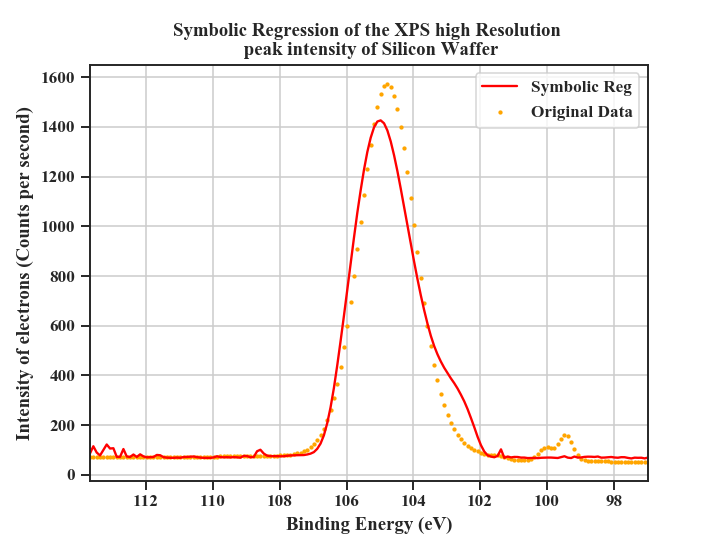

In [16]:
# Plot to see the results
plt.figure()
plt.scatter(X0, df.yCal, c='orange', label='Original Data', s=3)
plt.plot(X0, y_new, c='red', label='Symbolic Reg')

plt.title('Symbolic Regression of the XPS high Resolution \n peak intensity of Silicon Waffer')
plt.xlabel('Binding Energy (eV)')
plt.ylabel('Intensity of electrons (Counts per second)')
plt.legend()
plt.grid()
plt.xlim(df.x.max(), df.x.min())
plt.show()

# After more iterations, the symbolic regression generated a more accurate plot.
# Nevertheless, there is not a reliable interpretation of an analytic solution to the data. 